In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.tree import plot_tree

Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 data= pd.read_csv("/content/drive/MyDrive/Water-Potability-main/water_potability.csv")

In [ ]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.fillna(data.mean(),inplace=True)

In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

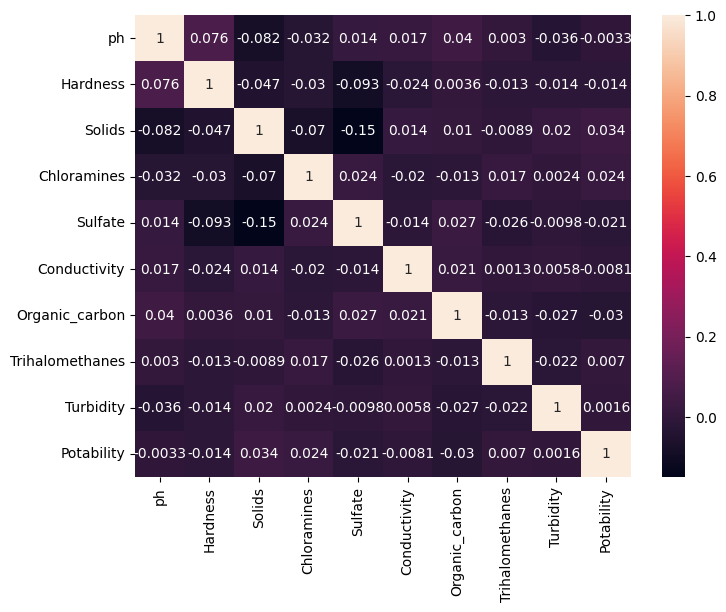

In [ ]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

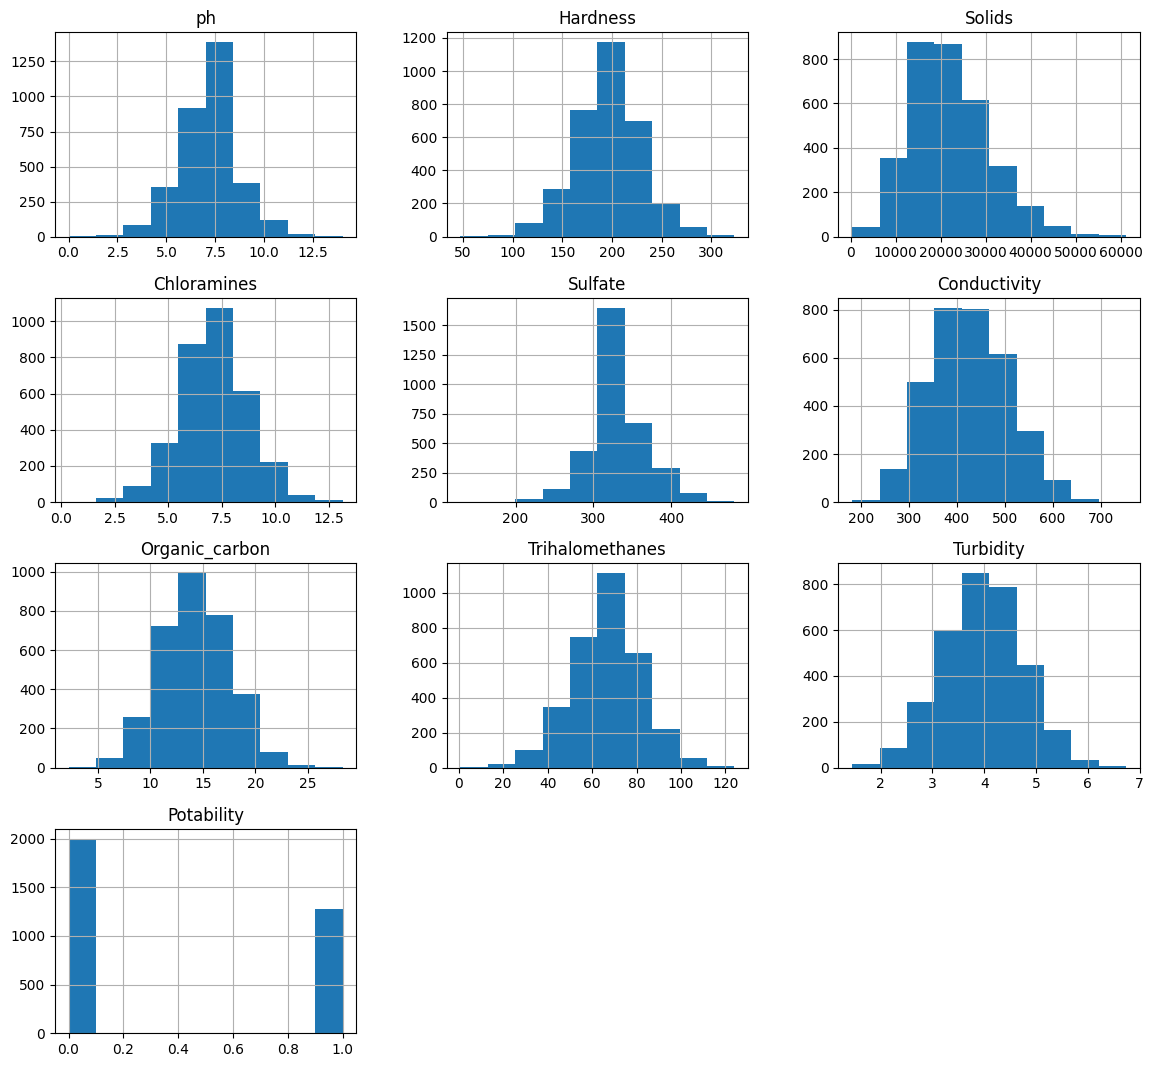

In [ ]:
data.hist(figsize=(14,13))
plt.show()

Partioning

In [ ]:
X = data.drop('Potability',axis=1)

In [ ]:
Y= data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.01, random_state=50)

In [ ]:
Y_train.value_counts()

0    1977
1    1266
Name: Potability, dtype: int64

In [ ]:
Y_test.value_counts()

0    21
1    12
Name: Potability, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(pred_dt,Y_test,)
print(accuracy_dt*100)

72.72727272727273


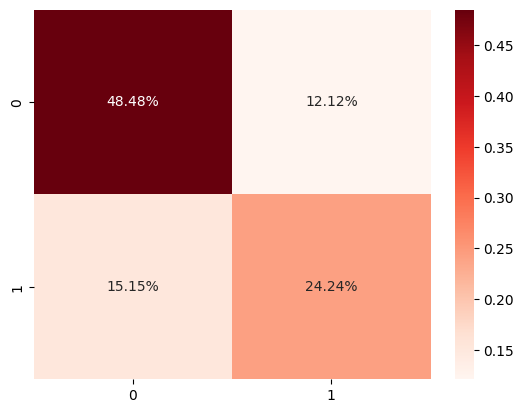

In [ ]:
cm1=confusion_matrix(pred_dt,Y_test)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

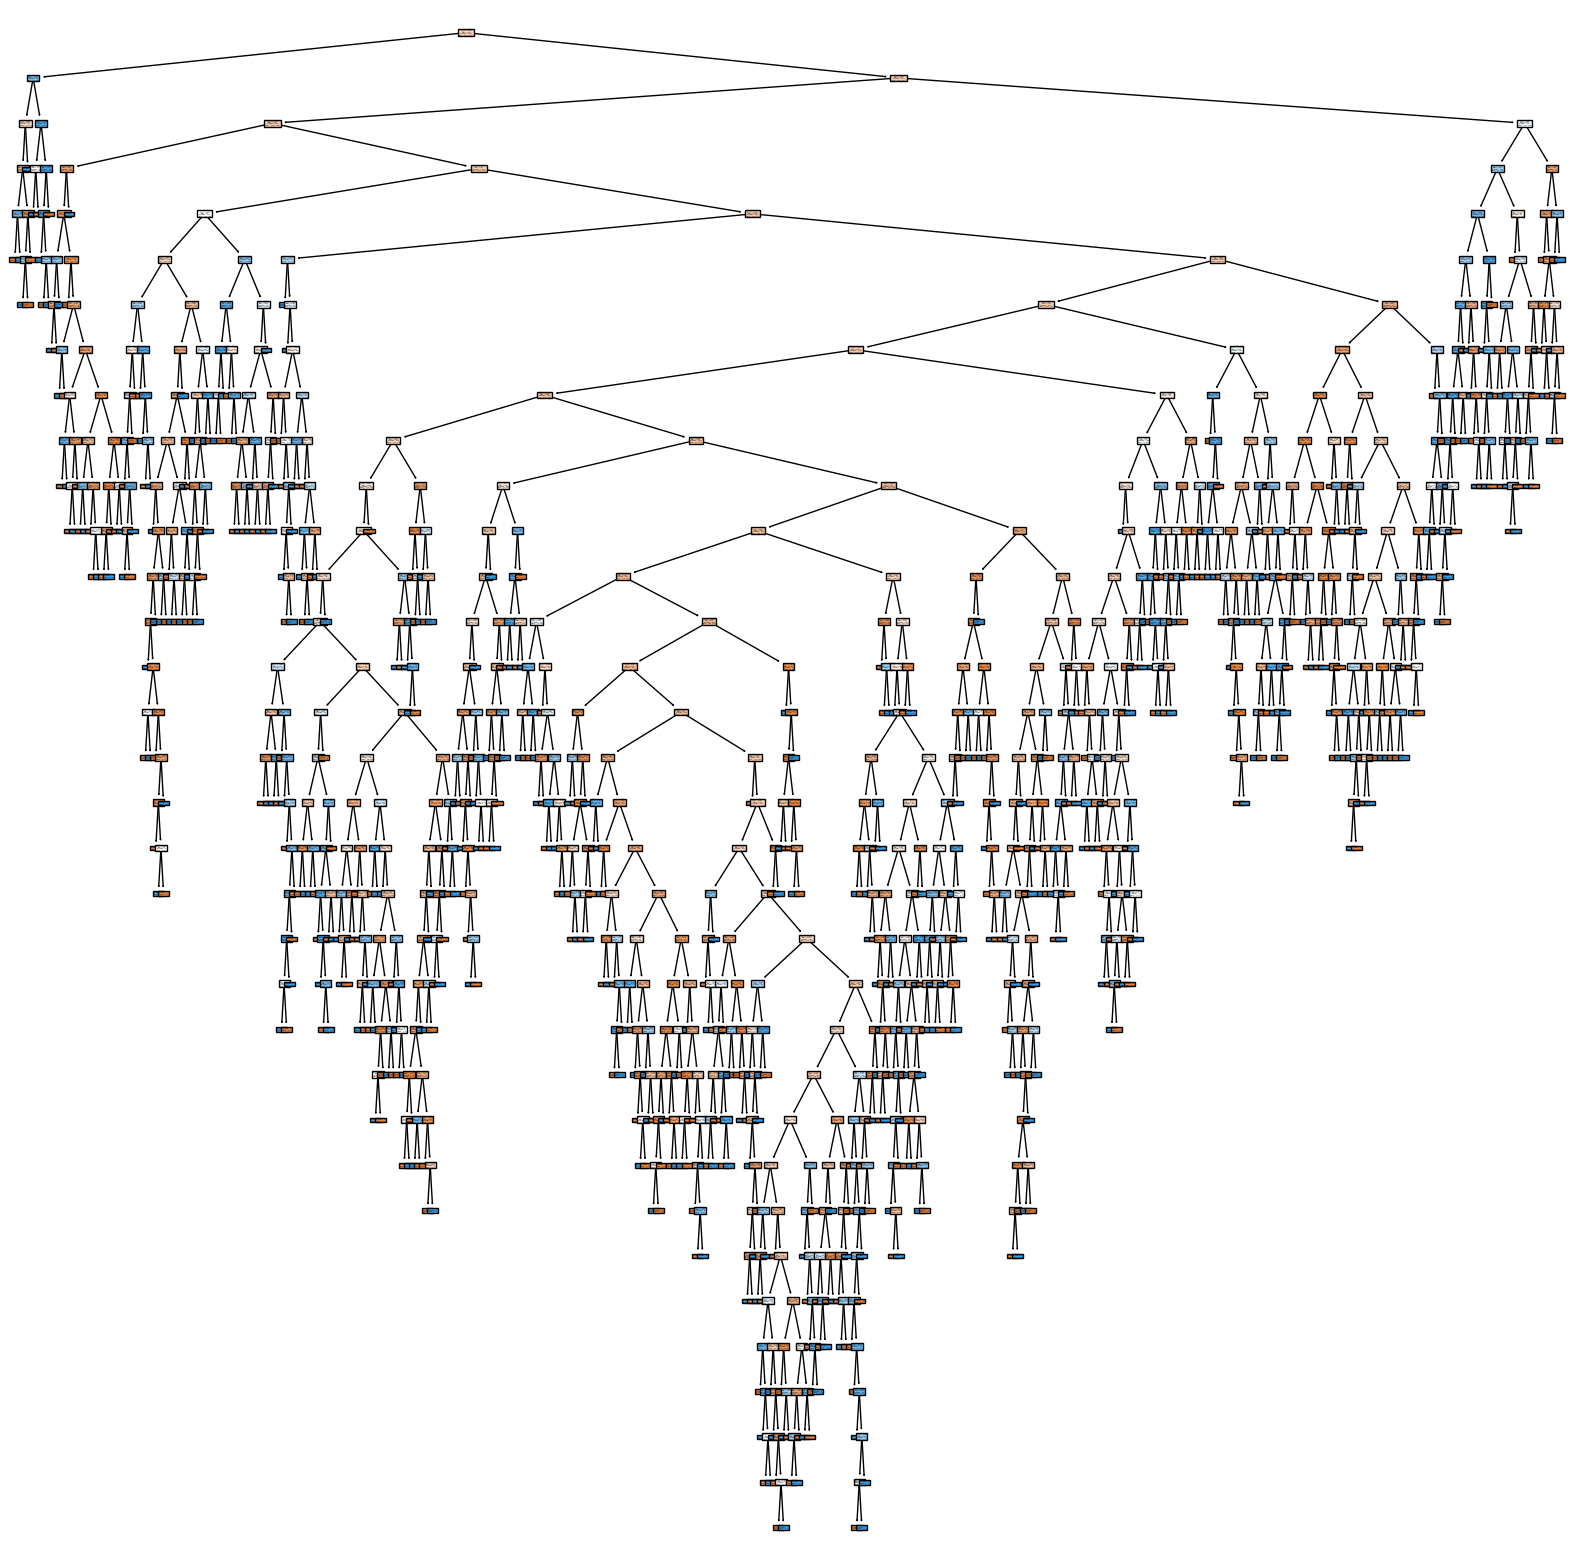

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(dt,filled = True)
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [ ]:
pred_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(pred_knn,Y_test)
print(accuracy_knn*100)

72.72727272727273


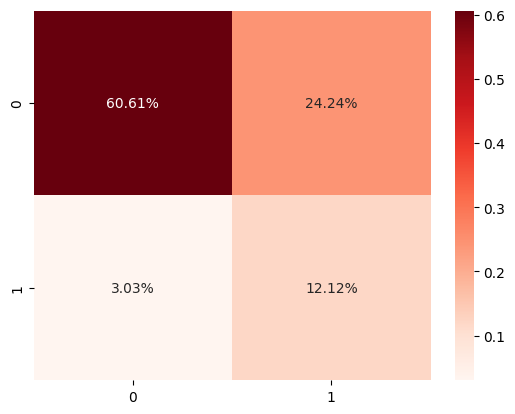

In [ ]:
cm2=confusion_matrix(pred_knn,Y_test)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lor= LogisticRegression()

In [ ]:
lor.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
pred_lor = lor.predict(X_test)
accuracy_lor= accuracy_score(pred_lor,Y_test)
print(accuracy_lor*100)

63.63636363636363


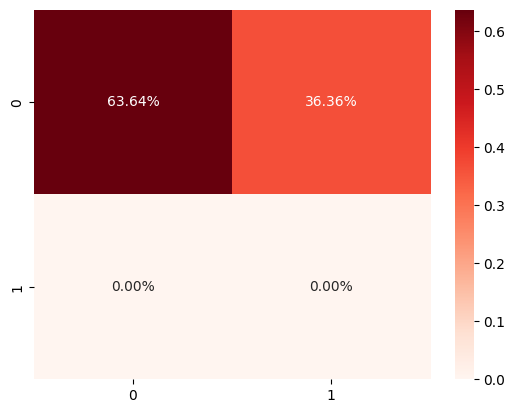

In [ ]:
cm3 = confusion_matrix(pred_lor,Y_test)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rf = RandomForestClassifier(n_estimators=54,criterion='entropy',random_state=0)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=54, random_state=0)

In [ ]:
pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(pred_rf,Y_test)
print(accuracy_rf*100)

78.78787878787878


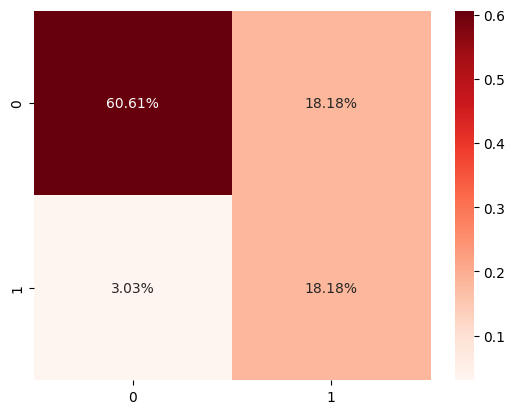

In [ ]:
cm4 = confusion_matrix(pred_rf,Y_test)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

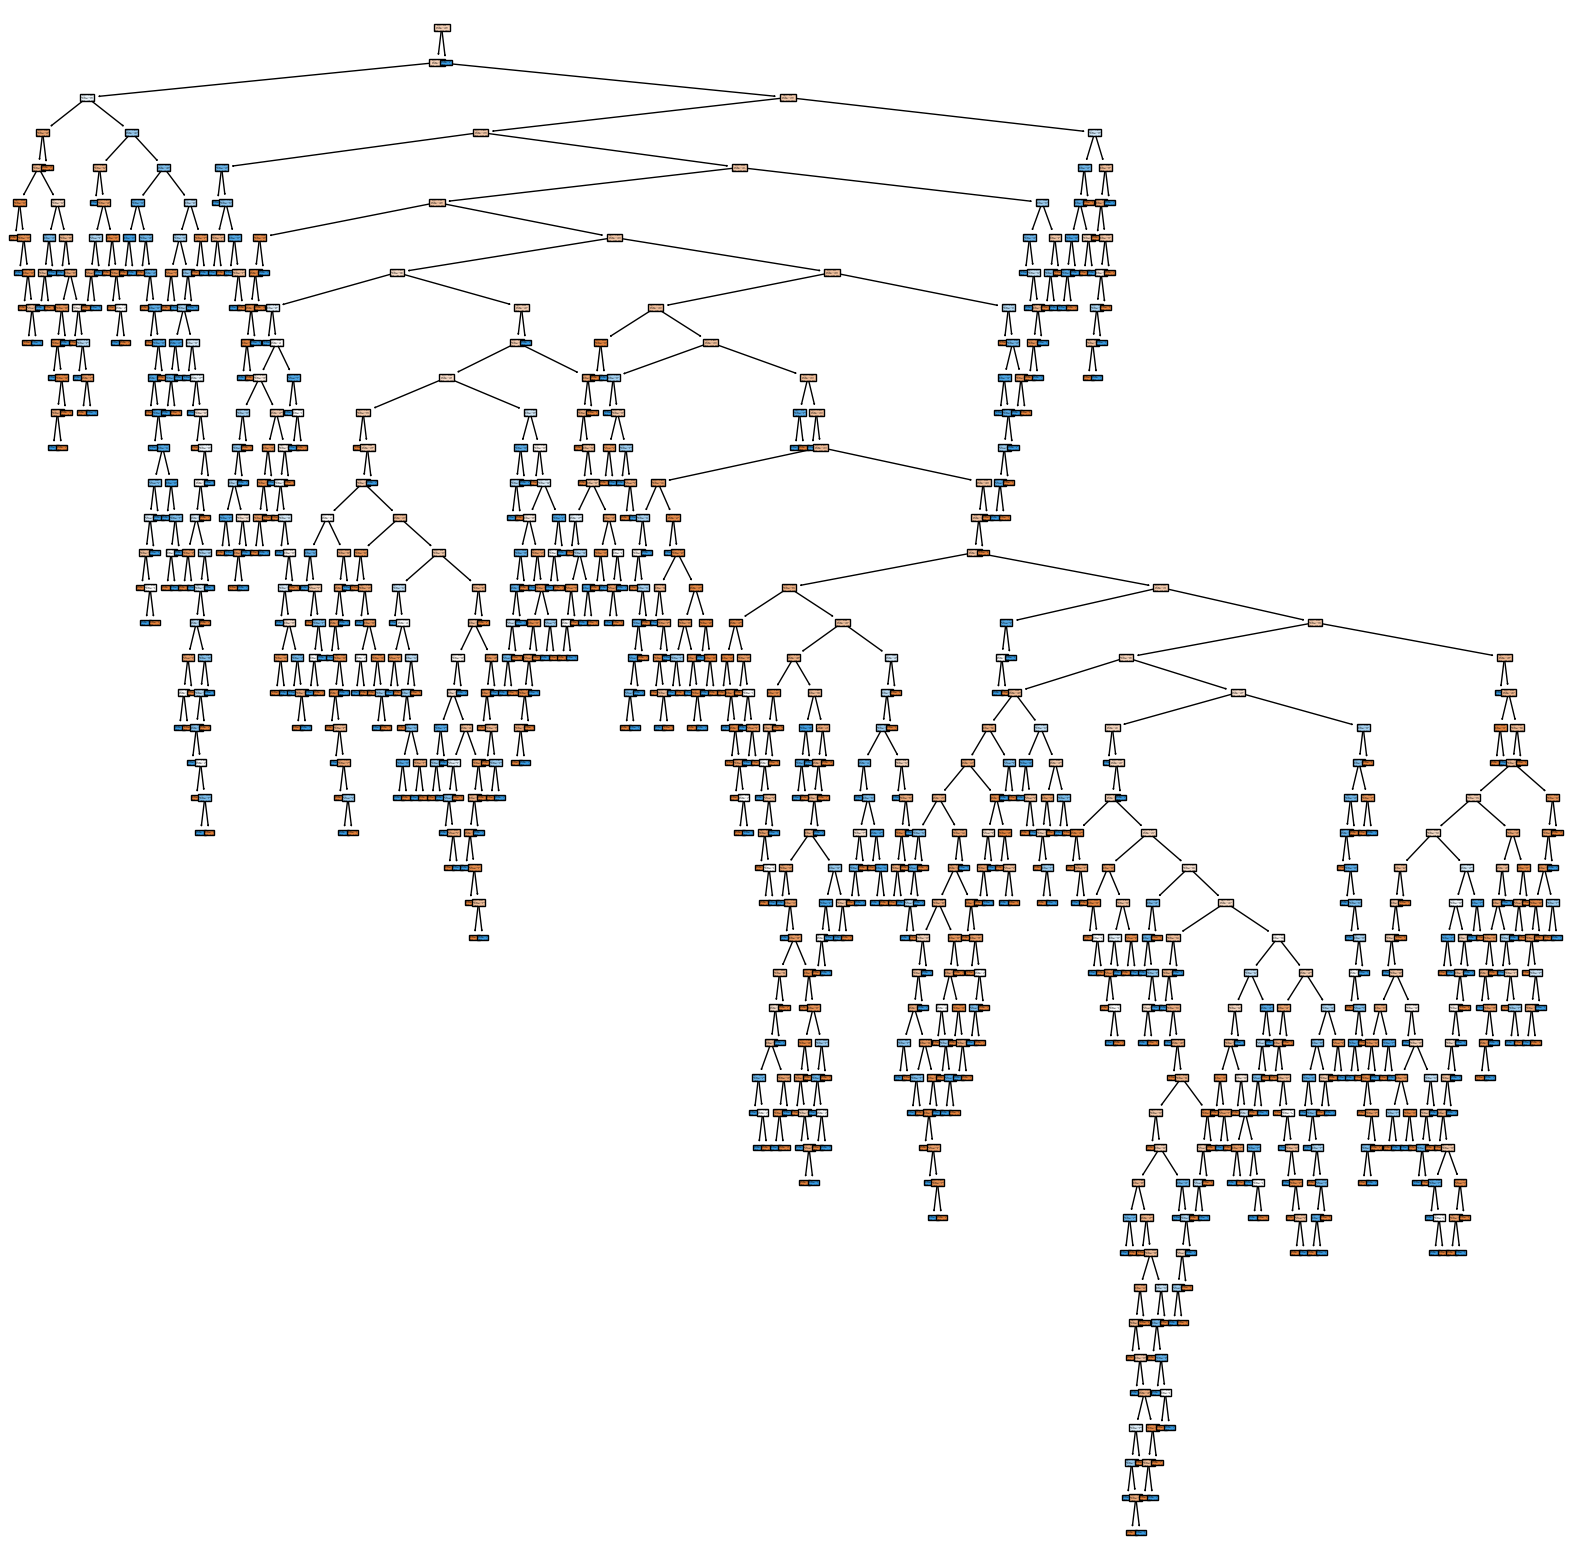

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf.estimators_[1],filled = True)
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
pred_nb = nb.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(pred_nb,Y_test)
print(accuracy_nb*100)

69.6969696969697


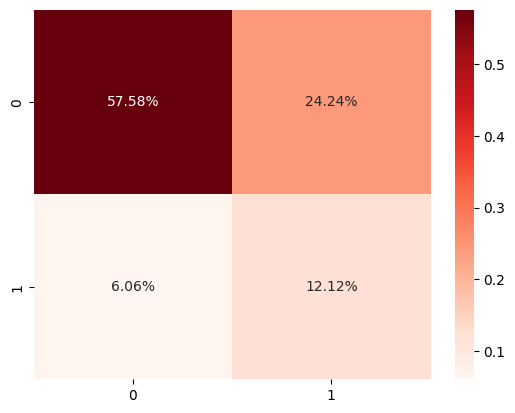

In [ ]:
cm5 = confusion_matrix(pred_nb,Y_test)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

KMeans

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

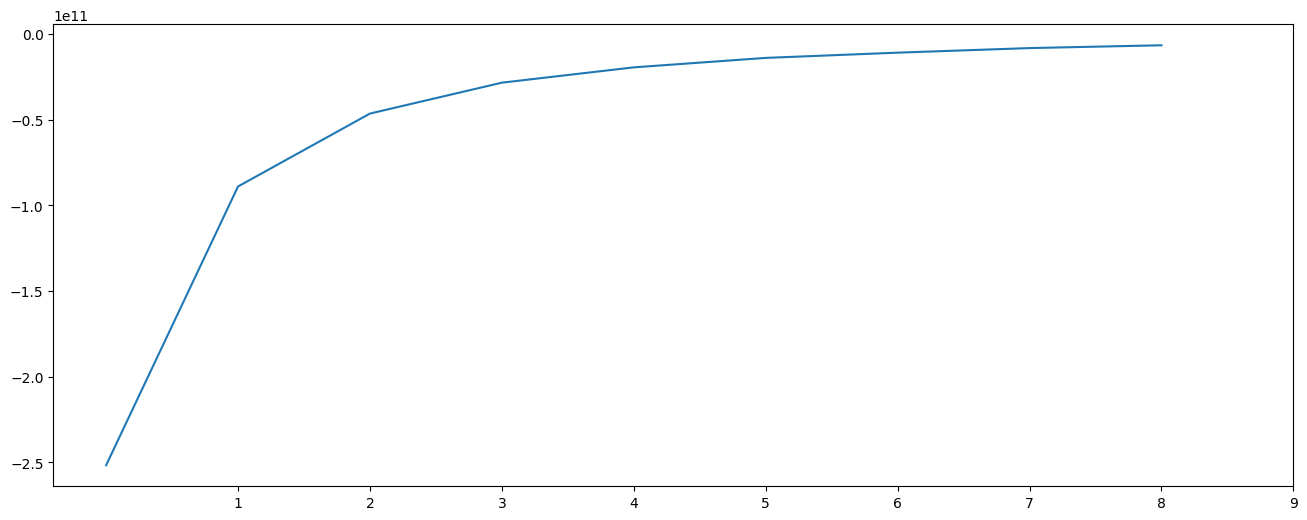

In [ ]:
n_cluster = range(1,10)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data)for i in range(len(kmeans))]
f = plt.figure(1,figsize=(16,6))
plt.plot(scores)
_=plt.xticks(n_cluster)

In [ ]:
km = KMeans(n_clusters=1)
km.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1)

In [ ]:
pred_km =km.predict(X_test)

In [ ]:
accuracy_km = accuracy_score(pred_km,Y_test)
print(accuracy_km*100)

63.63636363636363


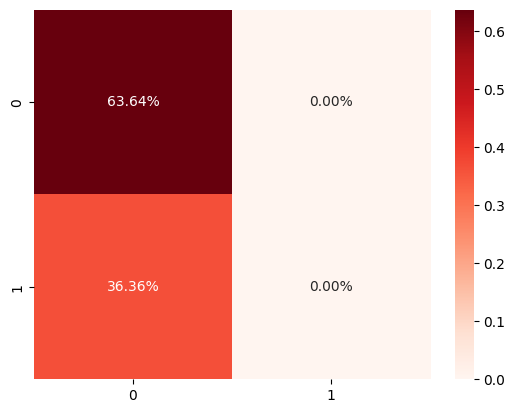

In [ ]:
cm6 = confusion_matrix(Y_test,pred_km)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
svm = SVC(kernel='rbf', random_state = 50)
svm.fit(X_train, Y_train)

SVC(random_state=50)

In [ ]:
pred_svm = svm.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(Y_test,pred_svm)
print(accuracy_svm*100)

72.72727272727273


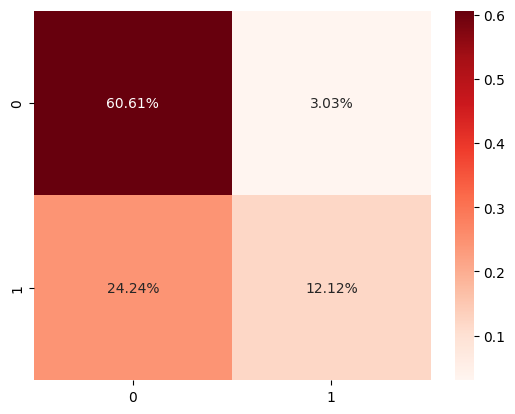

In [ ]:
cm7 = confusion_matrix(Y_test,pred_svm)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

Summary

,Model,Accuracy_score
4,Random Forest,0.787879
1,Decision Tree,0.727273
3,KNN,0.727273
5,SVM,0.727273
6,Naive Bayes,0.696970
0,Logistic Regression,0.636364
2,KMeans,0.636364


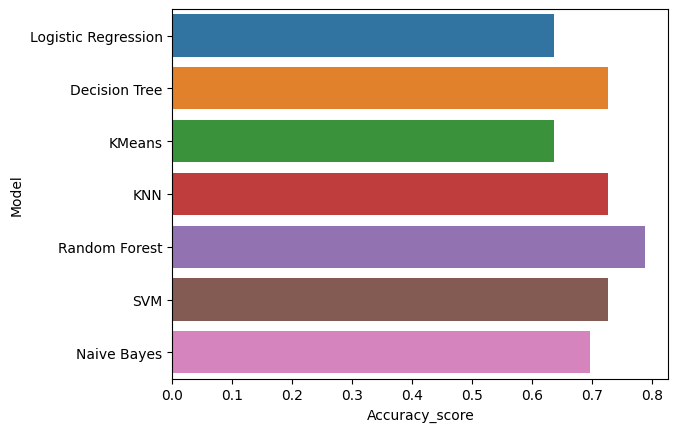

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'KMeans', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes'],
    'Accuracy_score' :[accuracy_lor, accuracy_dt, accuracy_km, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_nb]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)